In [1]:
#### Prepare libs

import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from smithplot import SmithAxes
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
import subprocess
warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

sns.set(color_codes=True)

In [ ]:
# First measurements

df_in = pd.read_csv('../measurements/input_HI_0.5V.csv', header=4)
df_in['Ampl'] *= 1e3
df_in['Time'] *= 1e6

df_out = pd.read_csv('../measurements/output_HI_0.5V.csv', header=4)
df_out['Ampl'] *= 1e3
df_out['Time'] *= 1e6

ax = df_in.plot('Time', 'Ampl', label='Input')
plt.plot(df_out['Time'], df_out['Ampl'], axes=ax, label='Output')
plt.ylabel('$A [mV]$')
plt.xlabel('$t [\mu s]$')
plt.ylim([-100, 100])
plt.xlim([-0.2, 0.2])
plt.legend()
plt.show()

In [ ]:
# First measurements

df_in = pd.read_csv('../measurements/input_LO_0.5V.csv', header=4)
df_in['Ampl'] *= 1e3
df_in['Time'] *= 1e6

df_out = pd.read_csv('../measurements/output_LO_0.5V.csv', header=4)
df_out['Ampl'] *= 1e3
df_out['Time'] *= 1e6

ax = df_in.plot('Time', 'Ampl', label='Input')
plt.plot(df_out['Time'], df_out['Ampl'], axes=ax, label='Output')
plt.ylabel('$A [mV]$')
plt.xlabel('$t [\mu s]$')
plt.ylim([-100, 100])
plt.xlim([-0.2, 0.2])
plt.legend()
plt.show()

In [ ]:
# Pseudo diffprobe

df_P = pd.read_csv('../measurements/diff_v1/channel1_firstdiff.csv', header=4)
df_P['Ampl'] *= 1e3
df_P['Time'] *= 1e6

df_N = pd.read_csv('../measurements/diff_v1/channel2_firstdiff.csv', header=4)
df_N['Ampl'] *= 1e3
df_N['Time'] *= 1e6

ax = df_P.plot('Time', 'Ampl', label='P')
plt.plot(df_N['Time'], df_N['Ampl'], axes=ax, label='N')
plt.ylabel('$A [mV]$')
plt.xlabel('$t [\mu s]$')
plt.ylim([-80, 80])
plt.xlim([-1, 1])
plt.legend()
plt.show()

series_diff = - df_P['Ampl'] + df_N['Ampl']
series_diff *= 0.5

df_diff_osc = pd.read_csv('../measurements/diff_v1/function_diff_firstdiff.csv', header=4)
df_diff_osc['Ampl'] *= 1e3
df_diff_osc['Time'] *= 1e6

df_in = pd.read_csv('../measurements/diff_v1/input_firstdiff.csv', header=4)
df_in['Ampl'] *= 1e3
df_in['Time'] *= 1e6

plt.plot(df_diff_osc['Time'], series_diff, label='Diff')
#plt.plot(df_diff_osc['Time'], df_diff_osc['Ampl'], label='Diff Oscilloscope')
plt.plot(df_in['Time'], df_in['Ampl'], label='Input')
plt.ylabel('$A [mV]$')
plt.xlabel('$t [\mu s]$')
plt.ylim([-80, 80])
plt.xlim([-1, 1])
plt.legend()
plt.show()

In [ ]:
# ---

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250
omega = 1e6 * 2 * math.pi
Z = 25

C = abs(1 / (Z * 1j * omega))
print(C)

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

rms_in = 1.2e-3
rms_out = 750e-6
V_Gain = 0.3

A = 20 * math.log10(rms_out / rms_in / a * 2)
print('A:', A, 'VdB')
A_should = 50 * V_Gain - 6.5
print('A should be:', A_should, 'dB')

V_Gain = 0.28

Gain_dB = -16 #dB
Gain_should = 50 * V_Gain - 6.5
a_Gain = 20 * math.log10(1 / a)
a_Diff = 20 * math.log10(2)
Gain_missing = Gain_should - (Gain_dB + a_Gain + a_Diff)
print('Missing Gain:', Gain_missing, 'dB')

In [ ]:
# ---

rms_in = 1.2e-3
rms_out = 1.3e-3
V_Gain = 0.28

print('a is:', a)

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

######################

rms_in = 1.2e-3
rms_out = 4.05e-3
V_Gain = 0.5

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

######################

rms_in = 1.2e-3
rms_out = 21.4e-3
V_Gain = 0.8

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

######################

rms_in = 1.173e-3
rms_out = 1.307e-3
V_Gain = 0.27

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

In [ ]:
# FUTSCH

rms_in = [1.29e-3] * 6
rms_out = np.array([0.455e-3, 0.765e-3, 2.03e-3, 5.88e-3, 18.18e-3, 50e-3])
V_Gain = [0.00, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a)
plt.plot(V_Gain, A, label='HI Z, HILO=HI')

rms_in = [1.29e-3] * 6
rms_out = np.array([0.420e-3, 0.520e-3, 1.048e-3, 2.95e-3, 9.08e-3, 25.2e-3])
V_Gain = [0.0148, 0.21, 0.386, 0.61, 0.88, 1.002]
A = 20 * np.log10(rms_out / rms_in / a)
plt.plot(V_Gain, A, label='50$\\Omega$, HILO=HI')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [8, 15, 26, 37, 47, 55]
plt.plot(V_Gain, A, label='SOLL Datasheet, HILO=HI')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [-3, 4, 14, 24, 34, 43]
plt.plot(V_Gain, A, label='SOLL Datasheet, HILO=LO')

plt.legend()
plt.show()

In [ ]:
#NOCH GANZ

Z0 = 50
ZL = 60
comp_input_Z = 20*math.log10(1-((ZL-Z0)/(ZL+Z0)))

rms_in = [1.29e-3] * 6
rms_out = np.array([0.230e-3, 0.245e-3, 0.345e-3, 0.795e-3, 2.5e-3, 7.9e-3])
V_Gain = [0.033, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a * 2) - comp_input_Z
plt.scatter(V_Gain, A, label='50$\\Omega$ , HILO=LOW')

rms_in = [4.45e-3, 4.455e-3] + [1.29e-3] * 4
rms_out = np.array([0.260e-3, 0.43e-3, 0.345e-3, 0.795e-3, 2.5e-3, 7.9e-3])
V_Gain = [0.033, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a * 2) - comp_input_Z
plt.scatter(V_Gain, A, label='50$\\Omega$ , HILO=LOW, alternative', color='brown')

rms_in = [1.29e-3] * 6
rms_out = np.array([0.27e-3, 0.430e-3, 1.08e-3, 3.03e-3, 9.7e-3, 26.0e-3])
V_Gain = [0.066, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a * 2) - comp_input_Z
plt.scatter(V_Gain, A, label='50$\\Omega$ , HILO=HI', color='orange')

# rms_in = [1.29e-3] * 6
# rms_out = np.array([0.420e-3, 0.520e-3, 1.048e-3, 2.95e-3, 9.08e-3, 25.2e-3])
# V_Gain = [0.0148, 0.21, 0.386, 0.61, 0.88, 1.002]
# A = 20 * np.log10(rms_out / rms_in / a)
# plt.plot(V_Gain, A, label='50$\\Omega$, HILO=HI')

V_Gain = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
A_should = 50 * V_Gain - 6.5
plt.plot(V_Gain, A_should, label='SOLL Datasheet Calculated, HILO=LO', color='red')

V_Gain = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
A_should = 50 * V_Gain + 5.5
plt.plot(V_Gain, A_should, label='SOLL Datasheet Calculated, HILO=HI', color='green')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [8, 15, 26, 37, 47, 55]
plt.scatter(V_Gain, A, label='SOLL Datasheet, HILO=HI', color='green')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [-3, 4, 14, 24, 34, 43]
plt.scatter(V_Gain, A, label='SOLL Datasheet, HILO=LO', color='red')

plt.legend(bbox_to_anchor=(0.1, 0.9),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
#NOCH GANZ

Z0 = 50
ZL = 45
comp_input_Z = 20*math.log10(1-((ZL-Z0)/(ZL+Z0)))
#print(comp_input_Z)

V_Gain = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
A_should = 50 * V_Gain - 6.5
plt.plot(V_Gain, A_should, label='SOLL Datasheet Calculated, HILO=LO', color='red')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [-3, 4, 14, 24, 34, 43]
plt.scatter(V_Gain, A, label='SOLL Datasheet, HILO=LO', color='red')

V_Gain = [0.04, 0.21, 0.44, 0.6, 0.8, 1]
A = np.array([-28.93, -21.3, -10, -1.75, 7.8, 17.9]) + 20 * np.log10(1 / a * 2)
plt.scatter(V_Gain, A, label='VNA, HILO=LO', color='purple')

plt.legend(bbox_to_anchor=(0.1, 0.9),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
# Automated

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

f, axarr = plt.subplots(10, sharex=True)
f.set_size_inches(15, 40)
n = 0
print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(4, 101):
    i /= 100
    A_should = 50 * i - 6.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    axarr[n // 10].scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data)), color=colors[n % 10], label='')
    axarr[n // 10].axhline(A_should)
    n += 1
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')

#plt.legend()
f.show()
f.savefig('vga_2016-12-16_30dBm_transmission.svg')
f.savefig('vga_2016-12-16_30dBm_transmission.png', dpi=200)

In [ ]:
# ---
import scipy as sp

print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
means = []
should = []
x = []
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(13, 13)
axarr[0].set_xlim((0, 1.04))
for i in range(4, 101):
    i /= 100
    x.append(i)
    should.append(50 * i - 6.5)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    data = list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data))
    means.append(np.mean(data))
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
axarr[0].scatter(x, means, color=colors[n % 10])
axarr[0].plot(x, should, color=colors[n % 10])

diff = np.subtract(means, should)
axarr[1].bar(x, means, 0.008, color=colors[n % 10])
axarr[1].bar(x, diff, 0.008, color=list(map(lambda x: 'red' if np.sign(x) == -1 else 'green', diff)))

#plt.legend()
f.show()
f.savefig('vga_2016-12-16_30dBm_transmission2.svg')
f.savefig('vga_2016-12-16_30dBm_transmission2.png', dpi=200)

Done.


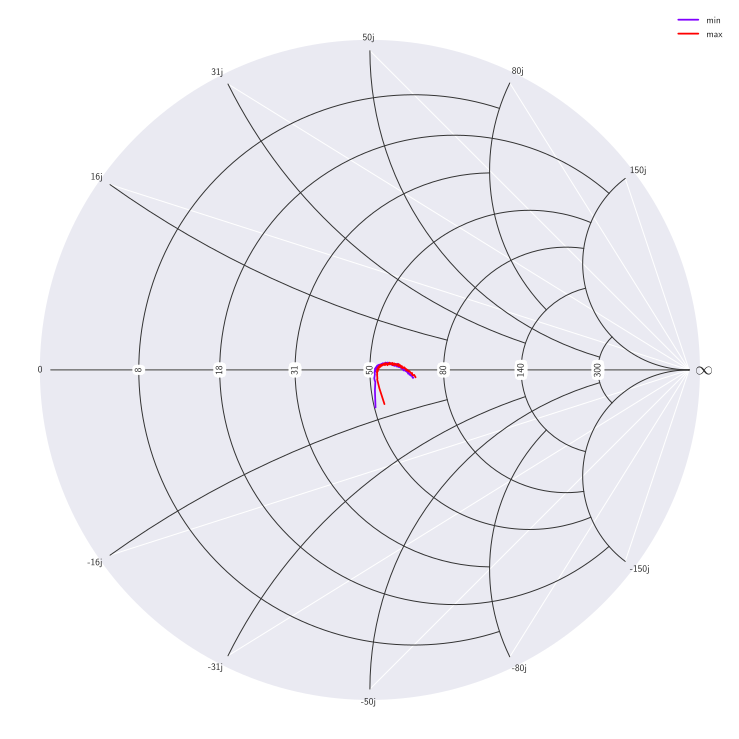

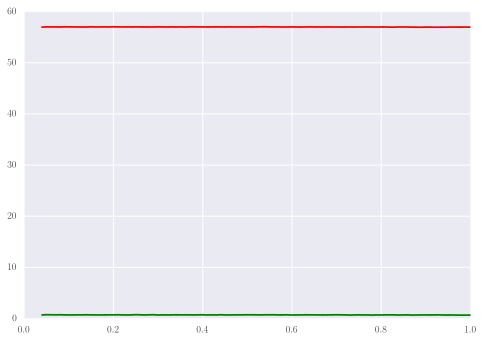

In [26]:
# ---

print('=' * 10)
Z0 = 50
colors = cm.rainbow(np.linspace(0, 1, 10))
impedance = []
x = []
std = []
mi = [1e9 for x in range(201)]
ma = [0 for x in range(201)]

kw = {
    'projection': 'smith',
    'grid_major_enable': True,
    'grid_minor_enable': False,
    'axes_normalize': False,
    'axes_impedance': 50
}
f, ax = plt.subplots(1, subplot_kw=kw)
f.set_size_inches(13, 13)
for i in range(4, 101):
    i /= 100
    x.append(i)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_2016-12-16_30dBm/reading_reflection_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_2016-12-16_30dBm/reading_reflection_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    S11 = data
    ZL =  (S11 * Z0 + Z0) / (1 - S11)
    mi = np.fmin(mi, ZL)
    ma = np.fmax(ma, ZL)
    impedance.append(np.mean(ZL))
    if i * 100 % 10 == 0:
        print('=', end='')
        
ax.plot(mi, datatype=SmithAxes.Z_PARAMETER, color=colors[0], label='min', marker=None)
ax.plot(ma, datatype=SmithAxes.Z_PARAMETER, color=colors[9], label='max', marker=None)
print('\nDone.')

ax.legend(bbox_to_anchor=(1, 1))
f.show()
#f.savefig('vga_2016-12-16_30dBm_impedance.svg')
#f.savefig('vga_2016-12-16_30dBm_impedance.png', dpi=200)

plt.figure()
plt.plot(x, list(map(np.real, impedance)), color='red')
plt.plot(x, list(map(np.imag, impedance)), color='green')
plt.show()